In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Create syntetic dataset using uniform distribution
n_samples = 100
np.random.seed(0)
area = np.random.uniform(0,1,n_samples)
price = 1.5 + 3 * area + np.random.normal(0, 0.1, n_samples)
area = area.reshape(-1,1)
price = price.reshape(-1,1)

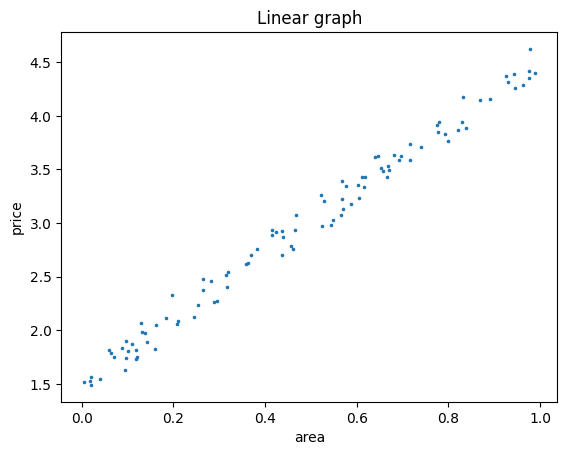

In [3]:
plt.scatter(area,price,s=2.5)
plt.title("Linear graph")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [42]:
#Prediction training x -> y
def predict(X,w):
    return np.dot(X,w)

#Cost function
def cost(X,y,w):
    m = X.shape[0]
    return np.sum((predict(X,w)-y)**2) * 1/(2*m)

#Gradient (MSE) and Gradient descent 
def gradient(X,y,w):
    m = X.shape[0]
    return np.dot(X.T, predict(X,w)-y) * 1/m

def gradient_descent(x,y,alpha,epochs):
    X = np.hstack((np.ones((x.shape[0],1)),x))
    w = np.zeros((X.shape[1],1))
    cost_history = []
    plt.figure()
    for i in range(epochs):
        if(i<500 and i%100==0):
            plt.scatter(x,y,s=5)
            plt.plot(x,predict(X,w),c='r')
            plt.legend(['Actual','Predicted'])
            plt.xlabel("area")
            plt.ylabel("price")
            plt.title("Linear Regression with Gradient descent")
        w = w - alpha * gradient(X,y,w)
        cost_history.append(cost(X,y,w))
    plt.show()
    return w, cost_history

In [43]:
#Split dataset into train, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(area, price, test_size=0.3, random_state=0)

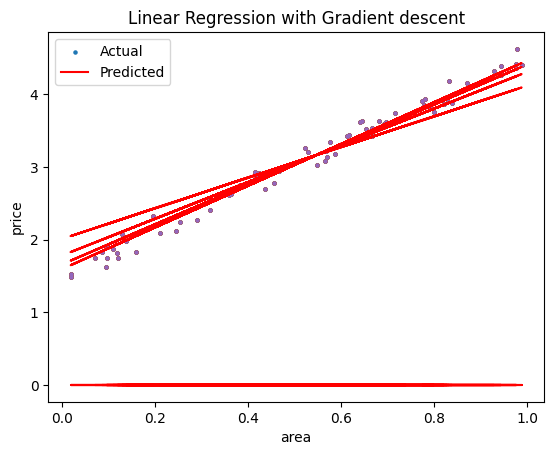

Linear regression equation: price = 1.55854 + 2.93335 area


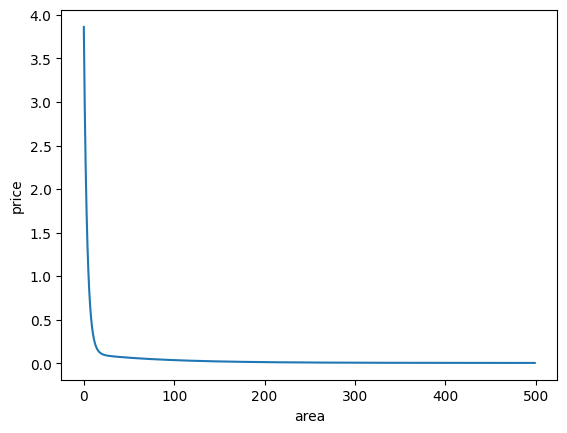

In [44]:
#train using gradient descent
w, cost_history = gradient_descent(x_train,y_train,0.1,500)
print("Linear regression equation: price = %.5f + %.5f area"%(w[0,0],w[1,0]))
plt.figure()
plt.plot(cost_history)
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [17]:
#Model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))
y_pred = predict(X_test,w)
print('MSE: ', mean_squared_error(y_test,y_pred))
print('R2: ', r2_score(y_test,y_pred))
print('MAE: ', mean_absolute_error(y_test,y_pred))

MSE:  0.009959897865213556
R2:  0.9857568914629122
MAE:  0.08535494426753401


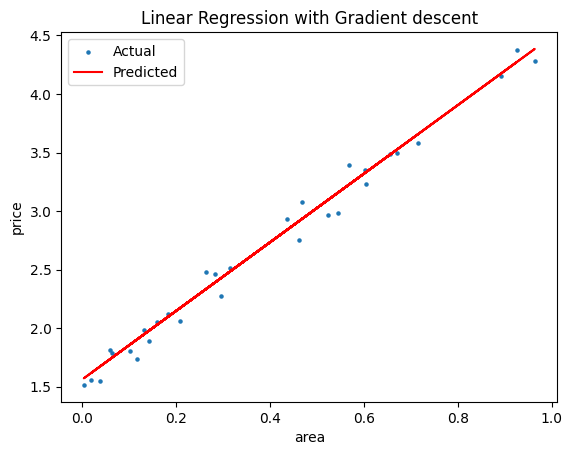

In [21]:
#Plot the prediction vs actual
plt.scatter(x_test,y_test,s=5)
plt.plot(x_test,y_pred,c='r')
plt.legend(['Actual','Predicted'])
plt.xlabel("area")
plt.ylabel("price")
plt.title("Linear Regression with Gradient descent")
plt.show()

**Training Linear Regression Using Sklearn**

In [45]:
#Declare Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#Train the model
lr.fit(x_train,y_train)
print("Linear regression equation: price = %.5f + %.5f area"%(lr.intercept_[0],lr.coef_[0,0]))

Linear regression equation: price = 1.51813 + 3.00735 area


In [46]:
#Evaluate model
y_pred = lr.predict(x_test)
print('MSE: ', mean_squared_error(y_test,y_pred))
print('R2: ', r2_score(y_test,y_pred))
print('MAE: ', mean_absolute_error(y_test,y_pred))

MSE:  0.009851320149224239
R2:  0.9859121625524829
MAE:  0.08600736578064355


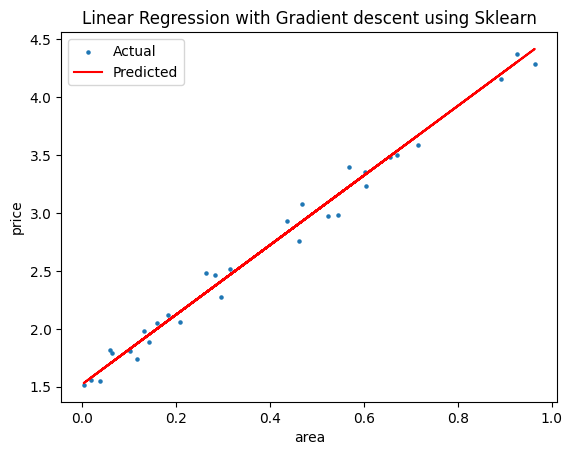

In [47]:
#Plot the prediction vs actual
plt.scatter(x_test,y_test,s=5)
plt.plot(x_test,y_pred,c='r')
plt.legend(['Actual','Predicted'])
plt.xlabel("area")
plt.ylabel("price")
plt.title("Linear Regression with Gradient descent using Sklearn")
plt.show()